## **AirBnb**

## **EDA**

In [155]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from scipy.sparse import hstack, csr_matrix
import warnings
warnings.filterwarnings("ignore")

In [4]:
train_X = pd.read_csv('airbnb_train_x.csv')

In [5]:
train_y = pd.read_csv('airbnb_train_y.csv')

In [6]:
train_X.head()

,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,...,maximum_nights,availability_30,availability_60,availability_90,availability_365,first_review,license,jurisdiction_names,cancellation_policy,features
0,Perfect Apt Steps From Central Park,"Central Park Apt! 2 bedroom 1 bath, a block aw...","2 bedroom 1 bath, a block away from train, 1 b...","Central Park Apt! 2 bedroom 1 bath, a block aw...",none,Central Park North is the north side of Centra...,NaN,The apartment is just a block away from the 2/...,You'll have access to the common areas: living...,I'll be available via text throughout your sta...,...,1125,12,42,72,72,2016-11-22,NaN,NaN,strict,"Host Has Profile Pic,Host Identity Verified,Is..."
1,2 bedroom Bernal Heights Condo - FABULOUS views!,"An entire lovely, comfortable, quiet and relax...","My condo is a light -filled two bedroom, one b...","An entire lovely, comfortable, quiet and relax...",none,Bernal Heights is like a village. It has been...,This condo is located on a hill and is on the ...,I will be happy to provide you with my Uber an...,As guests who are renting my entire condo whil...,I can be reached anytime by calling or texting...,...,29,0,0,0,0,2011-10-03,NaN,SAN FRANCISCO,strict,"Host Is Superhost,Host Has Profile Pic,Host Id..."
2,Zen in the Heart of Brooklyn,"Sunny room in cozy apartment close to JFK, LGA...",The apartment is located in the heart of Bushw...,"Sunny room in cozy apartment close to JFK, LGA...",none,Bushwick is an extremely hot neighborhood righ...,NaN,Our location is extremely convenient to get al...,"You will have access to the bedroom, living ro...",I have been living in this neighborhood for 4 ...,...,1125,30,60,90,365,2015-10-13,NaN,NaN,strict,"Host Has Profile Pic,Host Identity Verified,Is..."
3,any term sublet night week months,NaN,hi love to host u the apt loceded in the uppe...,hi love to host u the apt loceded in the uppe...,none,NaN,NaN,NaN,NaN,NaN,...,365,10,33,63,338,2010-04-11,NaN,NaN,strict,"Host Has Profile Pic,Is Location Exact"
4,Cozy and Small bedroom in Astoria!!,"Small bedroom but comfy in Astoria, close to t...",NaN,"Small bedroom but comfy in Astoria, close to t...",none,"Astoria is a great area. Lots of bar, restaura...",NaN,NaN,NaN,NaN,...,1125,0,1,1,17,2016-02-01,NaN,NaN,flexible,"Host Has Profile Pic,Host Identity Verified,Is..."


In [7]:
train_y.head()

,high_booking_rate,perfect_rating_score
0,NO,YES
1,NO,NO
2,NO,YES
3,NO,NO
4,NO,YES


In [8]:
train_X.shape

(92067, 61)

In [9]:
train_y.shape

(92067, 2)

In [10]:
train_X.describe()

,host_response_rate,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,beds,square_feet,...,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365
count,78617.000000,92067.000000,91898.000000,92067.000000,92067.000000,92017.000000,91786.000000,91954.000000,91976.000000,1680.000000,...,42910.000000,71887.000000,92067.000000,92067.000000,92067.000000,9.206700e+04,92067.000000,92067.000000,92067.000000,92067.000000
mean,95.021420,3.381255,7.091525,37.705859,-97.030993,3.454286,1.274067,1.339474,1.845384,928.016667,...,272.012398,66.942716,1.765692,13.985250,3.219872,1.768288e+05,10.494173,24.783516,41.474405,179.691410
std,14.071009,8.599634,42.484994,4.399965,20.721723,2.322975,0.625823,0.911366,1.396918,1137.712218,...,165.804941,54.801368,1.478341,22.352321,11.072070,1.887079e+07,10.487516,21.320198,32.314087,137.535477
min,0.000000,1.000000,0.000000,29.898266,-122.833981,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,100.000000,1.000000,1.000000,34.057637,-118.361330,2.000000,1.000000,1.000000,1.000000,350.000000,...,150.000000,29.000000,1.000000,0.000000,1.000000,3.000000e+01,0.000000,2.000000,7.000000,40.000000
50%,100.000000,1.000000,1.000000,38.894000,-97.671020,2.000000,1.000000,1.000000,1.000000,750.000000,...,249.000000,50.000000,1.000000,5.000000,2.000000,1.125000e+03,7.000000,22.000000,42.000000,169.000000
75%,100.000000,2.000000,3.000000,40.740181,-73.983290,4.000000,1.000000,2.000000,2.000000,1200.000000,...,400.000000,90.000000,2.000000,20.000000,3.000000,1.125000e+03,19.000000,44.000000,71.000000,322.000000
max,100.000000,212.000000,1026.000000,47.733358,-71.000100,18.000000,8.000000,10.000000,16.000000,32292.000000,...,999.000000,950.000000,20.000000,500.000000,1250.000000,2.147484e+09,30.000000,60.000000,90.000000,365.000000


In [11]:
train_y.describe()

,high_booking_rate,perfect_rating_score
count,92067,92067
unique,2,2
top,NO,NO
freq,73405,65620


In [12]:
train_X.columns

Index(['name', 'summary', 'space', 'description', 'experiences_offered',
       'neighborhood_overview', 'notes', 'transit', 'access', 'interaction',
       'house_rules', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications', 'street',
       'neighborhood', 'neighborhood_group', 'city', 'state', 'zipcode',
       'market', 'smart_location', 'country_code', 'country', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bedrooms', 'beds', 'bed_type', 'amenities', 'square_feet', 'price',
       'weekly_price', 'monthly_price', 'security_deposit', 'cleaning_fee',
       'guests_included', 'extra_people', 'minimum_nights', 'maximum_nights',
       'availability_30', 'availability_60', 'availability_90',
       'availability_365', 'first_review', 'license', '

In [13]:
train_y.columns

Index(['high_booking_rate', 'perfect_rating_score'], dtype='object')

In [14]:
train_X.isna().sum().sort_values(ascending=False).loc[lambda x: x > 0]

square_feet                  90387
license                      83919
host_acceptance_rate         78065
weekly_price                 73556
monthly_price                69637
neighborhood_group           61376
security_deposit             49157
jurisdiction_names           46986
notes                        46320
interaction                  35406
access                       33663
neighborhood_overview        29639
house_rules                  27833
host_about                   27830
transit                      27732
cleaning_fee                 20180
space                        19625
host_neighbourhood           13998
host_response_time           13450
host_response_rate           13450
summary                       3251
zipcode                        961
price                          533
host_location                  411
amenities                      388
market                         370
bathrooms                      281
host_verifications             169
host_total_listings_

In [15]:
train_y.isna().sum()

high_booking_rate       0
perfect_rating_score    0
dtype: int64

In [16]:
train_X.select_dtypes(include='object').columns

Index(['name', 'summary', 'space', 'description', 'experiences_offered',
       'neighborhood_overview', 'notes', 'transit', 'access', 'interaction',
       'house_rules', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_acceptance_rate', 'host_neighbourhood',
       'host_verifications', 'street', 'neighborhood', 'neighborhood_group',
       'city', 'state', 'zipcode', 'market', 'smart_location', 'country_code',
       'country', 'property_type', 'room_type', 'bed_type', 'amenities',
       'first_review', 'license', 'jurisdiction_names', 'cancellation_policy',
       'features'],
      dtype='object')

In [17]:
train_X.dtypes.unique()

array([dtype('O'), dtype('float64'), dtype('int64')], dtype=object)

In [18]:
for i in train_X.select_dtypes(include='object').columns:
  print("Number of Unique values in column ", i, " are: ", train_X[i].nunique())

Number of Unique values in column  name  are:  90781
Number of Unique values in column  summary  are:  85231
Number of Unique values in column  space  are:  69691
Number of Unique values in column  description  are:  90398
Number of Unique values in column  experiences_offered  are:  1
Number of Unique values in column  neighborhood_overview  are:  56360
Number of Unique values in column  notes  are:  41178
Number of Unique values in column  transit  are:  58282
Number of Unique values in column  access  are:  52677
Number of Unique values in column  interaction  are:  50267
Number of Unique values in column  house_rules  are:  57404
Number of Unique values in column  host_name  are:  17855
Number of Unique values in column  host_since  are:  2989
Number of Unique values in column  host_location  are:  1908
Number of Unique values in column  host_about  are:  46156
Number of Unique values in column  host_response_time  are:  4
Number of Unique values in column  host_acceptance_rate  ar

In [19]:
train_X['host_since'].unique()

array(['2015-07-03', '2009-05-25', '2015-01-20', ..., '2010-04-16',
       '2009-12-17', '2009-05-29'], dtype=object)

In [20]:
train_X['host_response_time'].unique()

array(['within an hour', 'within a few hours', nan, 'within a day',
       'a few days or more'], dtype=object)

In [21]:
train_X['host_acceptance_rate'].unique()

array([nan, '100%', '76%', '91%', '0%', '75%', '33%', '88%', '55%', '83%',
       '99%', '79%', '89%', '94%', '93%', '63%', '71%', '69%', '67%',
       '81%', '90%', '96%', '36%', '61%', '98%', '64%', '86%', '92%',
       '68%', '80%', '97%', '45%', '62%', '54%', '60%', '77%', '85%',
       '95%', '66%', '56%', '72%', '87%', '57%', '78%', '84%', '25%',
       '50%', '73%', '31%', '46%', '70%', '28%', '82%', '58%', '40%',
       '53%', '49%', '65%', '48%', '30%', '47%', '27%', '42%', '39%',
       '41%', '44%', '51%', '29%', '20%', '19%', '35%', '23%', '38%',
       '43%', '74%', '12%', '15%', '52%', '14%', '9%', '59%', '17%',
       '18%', '24%', '22%', '21%', '32%', '10%'], dtype=object)

In [22]:
train_X['neighborhood_group'].unique()

array(['Manhattan', nan, 'Brooklyn', 'Queens', 'Downtown', 'Central Area',
       'University District', 'Capitol Hill', 'Queen Anne',
       'Staten Island', 'Cascade', 'Other neighborhoods', 'Bronx',
       'Lake City', 'West Seattle', 'Beacon Hill', 'Delridge', 'Magnolia',
       'Ballard', 'Rainier Valley', 'Northgate', 'Seward Park',
       'Interbay'], dtype=object)

In [23]:
train_X['state'].unique()

array(['NY', 'CA', 'TX', 'WA', 'MA', 'LA', 'TN', 'CO', 'OR', 'IL', 'DC',
       'ny', 'ca', 'MD', 'Ca', 'il'], dtype=object)

In [24]:
train_X['market'].unique()

array(['New York', 'San Francisco', 'Los Angeles', 'Austin', 'Seattle',
       'Boston', 'East Bay, CA', 'San Diego', 'New Orleans', 'Nashville',
       'Denver', 'Portland', 'Chicago', 'D.C.', 'South Bay, CA', nan,
       'Other (Domestic)', 'Monterey Region', 'Las Vegas', 'Malibu',
       'Fontana', 'Cuba', 'Oregon Coast', 'South Florida Gulf Coast',
       'Pittsburg', 'Temecula Valley', 'Adirondacks', 'Nice',
       'Philadelphia', 'Erie', 'College Station', 'Chico', 'Carlsbad',
       'Umbria Countryside', 'Jamaica South Coast', 'Dallas',
       'Rio De Janeiro', 'Indianapolis', 'Portland, Maine', 'South Bend',
       'Coastal Orange County', 'Houston', 'Fresno', 'Toronto', 'Berlin',
       'Other (International)', 'Lagos, NG', 'Flims', 'San Antonio, US',
       'Paris', 'Providence', 'Bristol', 'Palm Springs Desert', 'Venice',
       'Chattanooga', 'Agra', 'Tel Aviv'], dtype=object)

In [25]:
train_X['property_type'].unique()

array(['Apartment', 'Condominium', 'House', 'Other', 'Townhouse',
       'Guesthouse', 'Bungalow', 'Boat', 'Cabin', 'Villa',
       'Bed & Breakfast', 'Boutique hotel', 'Treehouse', 'Loft',
       'Timeshare', 'Island', 'Entire Floor', 'Dorm', 'Hostel',
       'Camper/RV', 'Chalet', 'Tent', 'In-law', 'Serviced apartment',
       'Guest suite', 'Hut', 'Cave', 'Yurt', 'Lighthouse', 'Tipi',
       'Castle', 'Vacation home', nan, 'Plane', 'Earth House', 'Train'],
      dtype=object)

In [26]:
train_X['room_type'].unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

In [27]:
train_X['bed_type'].unique()

array(['Real Bed', 'Airbed', 'Pull-out Sofa', 'Futon', 'Couch'],
      dtype=object)

In [28]:
train_X['cancellation_policy'].unique()

array(['strict', 'flexible', 'moderate', 'super_strict_30',
       'super_strict_60', 'no_refunds'], dtype=object)

In [29]:
train_X['jurisdiction_names'].unique()

array([nan, 'SAN FRANCISCO', 'City of Los Angeles, CA', 'WASHINGTON',
       'OAKLAND',
       'SAN DIEGO, SAN DIEGO TOURISM MARKETING DISTRICT A, SAN DIEGO TOURISM MARKETING DISTRICT B',
       'Louisiana State, New Orleans, LA', 'OREGON, MULTNOMAH, PORTLAND',
       'Illinois State, Cook County, IL, CHICAGO',
       'DISTRICT OF COLUMBIA, WASHINGTON', 'Santa Monica',
       'Illinois State, Cook County, IL', 'MALIBU', 'OREGON',
       'DISTRICT OF COLUMBIA, STATE DEPARTMENT', 'Colorado State',
       'Louisiana State', 'OREGON, Washington County, OR',
       'Montgomery County, MD', 'Connecticut State',
       'Illinois State, Cook County, IL, Oak Park, IL',
       'OREGON, MULTNOMAH', 'OREGON, PORTLAND',
       'OREGON, Lane County, OR, Eugene, OR', 'PALO ALTO',
       'Arkansas State'], dtype=object)

# **Data Cleaning, Preprocessing and Feature Engineering training data**

In [31]:
train_X['host_response_rate']=train_X['host_response_rate']/100
train_X['host_response_rate'].unique()

array([1.  ,  nan, 0.99, 0.9 , 0.22, 0.8 , 0.  , 0.97, 0.83, 0.71, 0.91,
       0.98, 0.93, 0.33, 0.82, 0.75, 0.95, 0.5 , 0.14, 0.74, 0.92, 0.7 ,
       0.67, 0.6 , 0.88, 0.38, 0.96, 0.89, 0.85, 0.57, 0.86, 0.79, 0.94,
       0.63, 0.25, 0.84, 0.4 , 0.43, 0.76, 0.87, 0.81, 0.3 , 0.68, 0.29,
       0.78, 0.55, 0.73, 0.64, 0.77, 0.56, 0.72, 0.13, 0.48, 0.17, 0.53,
       0.27, 0.69, 0.54, 0.65, 0.31, 0.23, 0.44, 0.62, 0.36, 0.61, 0.52,
       0.2 , 0.42, 0.1 , 0.19, 0.09, 0.58, 0.59, 0.39, 0.51, 0.47, 0.46,
       0.04, 0.35, 0.07, 0.11, 0.41, 0.03, 0.18, 0.66, 0.49, 0.24, 0.34,
       0.45, 0.28, 0.05, 0.15])

In [32]:
train_X['host_acceptance_rate'] = (train_X['host_acceptance_rate'].str.rstrip('%').astype(float))
train_X['host_acceptance_rate'] = train_X['host_acceptance_rate']/100
train_X['host_acceptance_rate'].unique()

array([ nan, 1.  , 0.76, 0.91, 0.  , 0.75, 0.33, 0.88, 0.55, 0.83, 0.99,
       0.79, 0.89, 0.94, 0.93, 0.63, 0.71, 0.69, 0.67, 0.81, 0.9 , 0.96,
       0.36, 0.61, 0.98, 0.64, 0.86, 0.92, 0.68, 0.8 , 0.97, 0.45, 0.62,
       0.54, 0.6 , 0.77, 0.85, 0.95, 0.66, 0.56, 0.72, 0.87, 0.57, 0.78,
       0.84, 0.25, 0.5 , 0.73, 0.31, 0.46, 0.7 , 0.28, 0.82, 0.58, 0.4 ,
       0.53, 0.49, 0.65, 0.48, 0.3 , 0.47, 0.27, 0.42, 0.39, 0.41, 0.44,
       0.51, 0.29, 0.2 , 0.19, 0.35, 0.23, 0.38, 0.43, 0.74, 0.12, 0.15,
       0.52, 0.14, 0.09, 0.59, 0.17, 0.18, 0.24, 0.22, 0.21, 0.32, 0.1 ])

In [33]:
numerical_cols = train_X.select_dtypes(include=['int64', 'float64']).columns

for i in train_X.columns:
    if i in numerical_cols:
        train_X[i] = train_X[i].fillna(train_X[i].mean())
    else:
        train_X[i] = train_X[i].fillna("Not available")

train_X.isna().sum().loc[lambda x: x>0]

Series([], dtype: int64)

In [34]:
property_category_mapping = {
    'Apartment': 'apartment',
    'Serviced apartment': 'apartment',
    'Loft': 'apartment',
    'Bed & Breakfast': 'hotel',
    'Boutique hotel': 'hotel',
    'Hostel': 'hotel',
    'Townhouse': 'condo',
    'Condominium': 'condo',
    'Bungalow': 'house',
    'House': 'house',
    'Guesthouse': 'house',
    'Dorm': 'other',
    'Villa': 'house',
    'Cabin': 'other',
    'Camper/RV': 'other',
    'Boat': 'other',
    'Timeshare': 'other',
    'Guest suite': 'hotel',
    'Tent': 'other',
    'Treehouse': 'other',
    'Castle': 'other',
    'In-law': 'other',
    'Chalet': 'other',
    'Hut': 'other',
    'Yurt': 'other',
    'Earth House': 'other',
    'Entire Floor': 'other',
    'Tipi': 'other',
    'Cave': 'other',
    'Lighthouse': 'other',
    'Vacation home': 'other',
    'Island': 'other',
    'Train': 'other',
    'Plane': 'other'
}

train_X['property_category'] = train_X['property_type'].map(property_category_mapping).fillna('other')
train_X['property_category'].unique()

array(['apartment', 'condo', 'house', 'other', 'hotel'], dtype=object)

In [35]:
train_X['cancellation_policy'] = train_X['cancellation_policy'].replace({'super_strict_30':'strict', 'super_strict_60':'strict', 'no_refunds':'strict'})
train_X['cancellation_policy'].unique()

array(['strict', 'flexible', 'moderate'], dtype=object)

In [36]:
bed_type_mapping = {
    'Real Bed': 'real_bed',
    'Airbed': 'other',
    'Pull-out Sofa': 'other',
    'Futon': 'other',
    'Couch': 'other'
}

train_X['bed_category'] = train_X['bed_type'].map(bed_type_mapping).fillna('other')
train_X['bed_category'].unique()

array(['real_bed', 'other'], dtype=object)

In [37]:
train_X['market'].value_counts()

market
New York                    27729
Los Angeles                 20724
San Francisco                5985
Austin                       5353
D.C.                         5032
New Orleans                  4042
Chicago                      3978
San Diego                    3889
Portland                     2889
Seattle                      2854
Nashville                    2505
Boston                       2479
Denver                       1764
East Bay, CA                 1138
Monterey Region               537
Other (Domestic)              420
Not available                 370
Malibu                        197
South Bay, CA                  98
Fontana                        21
Carlsbad                        8
Coastal Orange County           4
South Florida Gulf Coast        4
Pittsburg                       4
Other (International)           3
Philadelphia                    3
Oregon Coast                    3
Temecula Valley                 3
Houston                         2
Jamaica

In [38]:
market_counts = train_X['market'].value_counts()
train_X['market'] = train_X['market'].apply(lambda x: 'Other' if market_counts.get(x, 0) < 421 else x)
train_X['market'].value_counts()

market
New York           27729
Los Angeles        20724
San Francisco       5985
Austin              5353
D.C.                5032
New Orleans         4042
Chicago             3978
San Diego           3889
Portland            2889
Seattle             2854
Nashville           2505
Boston              2479
Denver              1764
Other               1169
East Bay, CA        1138
Monterey Region      537
Name: count, dtype: int64

In [39]:
train_X[train_X['city']=="Not available"]

,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,...,availability_60,availability_90,availability_365,first_review,license,jurisdiction_names,cancellation_policy,features,property_category,bed_category
854,"Best Location, 2bdr Park Slope, Bk",The apt is just steps away from the Atlantic S...,"It's a spacious 2 bedroom (1 queen size bed, 1...",The apt is just steps away from the Atlantic S...,none,Not available,Policy is no pets but we can try to be flexibl...,This is the most ideal location to get around....,Not available,I try to personally greet each guess upon arri...,...,14,17,92,2016-08-22,Not available,Not available,flexible,"Host Has Profile Pic,Instant Bookable",condo,real_bed
1350,Room near CalArts & Six Flags,"Beautiful complex and great area, close to eve...",Not available,"Beautiful complex and great area, close to eve...",none,Not available,Not available,Not available,Not available,Not available,...,48,78,168,2016-03-23,Not available,Not available,moderate,Host Has Profile Pic,apartment,real_bed
5562,Welcome to a Great Place In NY!,"This beautiful, fully furnished bedroom in a c...",The apartment is very peaceful in this quiet n...,"This beautiful, fully furnished bedroom in a c...",none,"The area has so many restaurants, bars, and at...",Not available,There is a lot of public transportation in the...,"Wi-fi, kitchen, bathroom, and a cozy living room.",I enjoy being hospitable and making others fee...,...,31,59,59,2016-12-07,Not available,Not available,strict,"Host Has Profile Pic,Host Identity Verified,Is...",apartment,real_bed
8052,Nice & neat withWiFi near Manhattan,This is a great amazing 1-bedroom apartment in...,Not available,This is a great amazing 1-bedroom apartment in...,none,Not available,Not available,Not available,Not available,Not available,...,59,89,364,2016-06-18,Not available,Not available,strict,"Host Has Profile Pic,Host Identity Verified",apartment,real_bed
9373,Gorgeous modern spacious apartment,Gorgeous and modern full apartment in trendy ...,Your beautiful apartment is on the 4th floor i...,Gorgeous and modern full apartment in trendy ...,none,Bushwick is a cool and fun place to be. Full o...,Not available,We're super close to the J and M lines (.2 mil...,*Gym *Furnished roof top deck *Laundry Room - ...,I'll be happy to answer any questions you migh...,...,8,38,313,2016-04-24,Not available,Not available,moderate,"Host Has Profile Pic,Host Identity Verified",apartment,real_bed
10251,Beautiful Home in Encino. 15 Min from Everything!,This beautiful Encino home is close to the bea...,Not available,This beautiful Encino home is close to the bea...,none,Not available,Not available,Not available,Not available,Not available,...,0,0,0,2016-07-15,Not available,Not available,flexible,"Host Has Profile Pic,Host Identity Verified",house,real_bed
10599,Classic Twin Bed,Our comfortable room is light and airy. It inc...,Not available,Our comfortable room is light and airy. It inc...,none,Not available,Not available,Not available,Not available,Not available,...,32,62,337,2016-09-08,Not available,Not available,flexible,Host Has Profile Pic,house,real_bed
12513,Cozy Private room in Queens,My place is close to JFK Airport & the city. Y...,A quaint room in Jamaica NY.,My place is close to JFK Airport & the city. Y...,none,Not available,Not available,If you need directions or a drive let me know.,You can access the Q40 Bus to the Air train or...,You can call me at anytime (PHONE NUMBER HIDDEN),...,59,89,241,2017-02-04,Not available,Connecticut State,flexible,Host Has Profile Pic,house,real_bed
13485,Comfy yellow room with a view,Comfy private room in an old Victorian house. ...,"Is perfect for a single traveller or a couple,...",Comfy private room in an old Victorian house. ...,none,Our neighbourhood is a historic gem. Amazing c...,"5 min walk to the Silver Lake park, a little s...",5 min walk to a 10 min bus ride to the free fe...,"Full access to the kit

In [40]:
train_X['state'] = train_X['state'].astype('category')
train_X['state'].unique()

['NY', 'CA', 'TX', 'WA', 'MA', ..., 'ny', 'ca', 'MD', 'Ca', 'il']
Length: 16
Categories (16, object): ['CA', 'CO', 'Ca', 'DC', ..., 'WA', 'ca', 'il', 'ny']

In [41]:
train_X['state'] = train_X['state'].str.upper()
train_X['state'].unique()

array(['NY', 'CA', 'TX', 'WA', 'MA', 'LA', 'TN', 'CO', 'OR', 'IL', 'DC',
       'MD'], dtype=object)

In [42]:
train_X['has_cleaning_fee'] = train_X['cleaning_fee'].apply(lambda x: 'YES' if x > 0 else 'NO')
train_X['has_cleaning_fee'].unique()

array(['YES', 'NO'], dtype=object)

In [43]:
train_X['has_cleaning_fee'].value_counts()

has_cleaning_fee
YES    92040
NO        27
Name: count, dtype: int64

In [44]:
train_X['first_review'].isnull().sum()

0

In [45]:
train_X['first_review'].dtypes

dtype('O')

In [46]:
train_X['days_from_first_review'] = (pd.to_datetime('today') - pd.to_datetime(train_X['first_review'])).dt.days/365
train_X['days_from_first_review']= train_X['days_from_first_review'].astype(int)

In [47]:
train_X['security_deposit'].value_counts()

security_deposit
272.012398    49157
100.000000     8385
500.000000     7249
200.000000     6616
300.000000     4598
              ...  
116.000000        1
203.000000        1
525.000000        1
483.000000        1
504.000000        1
Name: count, Length: 244, dtype: int64

In [48]:
train_X['has_security_deposit'] = train_X['security_deposit'].apply(lambda x: 1 if x > 0 else 0)
train_X['has_security_deposit'].unique()

array([1, 0], dtype=int64)

In [49]:
train_X['host_since'] = pd.to_datetime(train_X['host_since'], errors='coerce')
train_X['host_tenure_days'] = (train_X['days_from_first_review'] + (pd.Timestamp.today() - train_X['host_since']).dt.days)
train_X['host_tenure_days'] = train_X['host_tenure_days'].fillna(train_X['host_tenure_days'].mean())

In [50]:
response_time_map = {
    'within an hour': 0,
    'within a few hours': 1,
    'within a day': 2,
    'a few days or more': 3,
    'Not available': 4
}

train_X['host_response_time'] = train_X['host_response_time'].map(response_time_map)

# **Joining Training Dataset with perfect_rating_score (Train_y)**

In [52]:
full_dataset = pd.concat([train_X, train_y], axis=1)
full_dataset

,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,...,cancellation_policy,features,property_category,bed_category,has_cleaning_fee,days_from_first_review,has_security_deposit,host_tenure_days,high_booking_rate,perfect_rating_score
0,Perfect Apt Steps From Central Park,"Central Park Apt! 2 bedroom 1 bath, a block aw...","2 bedroom 1 bath, a block away from train, 1 b...","Central Park Apt! 2 bedroom 1 bath, a block aw...",none,Central Park North is the north side of Centra...,Not available,The apartment is just a block away from the 2/...,You'll have access to the common areas: living...,I'll be available via text throughout your sta...,...,strict,"Host Has Profile Pic,Host Identity Verified,Is...",apartment,real_bed,YES,8,1,3615.0,NO,YES
1,2 bedroom Bernal Heights Condo - FABULOUS views!,"An entire lovely, comfortable, quiet and relax...","My condo is a light -filled two bedroom, one b...","An entire lovely, comfortable, quiet and relax...",none,Bernal Heights is like a village. It has been...,This condo is located on a hill and is on the ...,I will be happy to provide you with my Uber an...,As guests who are renting my entire condo whil...,I can be reached anytime by calling or texting...,...,strict,"Host Is Superhost,Host Has Profile Pic,Host Id...",condo,real_bed,YES,13,1,5850.0,NO,NO
2,Zen in the Heart of Brooklyn,"Sunny room in cozy apartment close to JFK, LGA...",The apartment is located in the heart of Bushw...,"Sunny room in cozy apartment close to JFK, LGA...",none,Bushwick is an extremely hot neighborhood righ...,Not available,Our location is extremely convenient to get al...,"You will have access to the bedroom, living ro...",I have been living in this neighborhood for 4 ...,...,strict,"Host Has Profile Pic,Host Identity Verified,Is...",apartment,real_bed,YES,9,1,3780.0,NO,YES
3,any term sublet night week months,Not available,hi love to host u the apt loceded in the uppe...,hi love to host u the apt loceded in the uppe...,none,Not available,Not available,Not available,Not available,Not available,...,strict,"Host Has Profile Pic,Is Location Exact",apartment,real_bed,YES,15,1,5696.0,NO,NO
4,Cozy and Small bedroom in Astoria!!,"Small bedroom but comfy in Astoria, close to t...",Not available,"Small bedroom but comfy in Astoria, close to t...",none,"Astoria is a great area. Lots of bar, restaura...",Not available,Not available,Not available,Not available,...,flexible,"Host Has Profile Pic,Host Identity Verified,Is...",apartment,real_bed,YES,9,1,3813.0,NO,YES
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92062,Sweet BR in Victorian Home Near Brooklyn College,These private rooms with a private bath are br...,My cozy four bedroom apartment on the 2nd and ...,These private rooms with a private bath are br...,none,Victorian Flatbush was built around the turn o...,A Baby Bjorn travel crib and high chair are av...,The apartment is 2 short blocks to the Newkirk...,"In addition to the spacious apartment, the coz...",I will help you in whatever way I can during y...,...,strict,"Host Is Superhost,Host Has Profile Pic,Host Id...",house,real_bed,YES,9,1,3633.0,NO,NO
92063,Charming Retreat,Enjoy a relaxing home away from home in this 1...,Not available,Enjoy a relaxing home away from home in this 1...,none,Not available,Not available,Not available,Not available,Not available,...,flexible,"Host Has Profile Pic,Host Identity Verified,Is...",apartment,real_bed,YES,8,1,3767.0,NO,NO
92064,Sunny 2 bedroom combo 精装公寓两房,"Super location near Downtown,Chinatown,McCormi...",2 bedrooms in a 3 bedroom apartment. Guests ha...,"Super location near Downtown,Chinatown,McCormi...",none,Chinatown is a unique Chicago neighborhood in ...,Not available,"10mins walk to Chinatown Square ,red line sub...","Kitchen ,Living room",Not available,...,flexible,"Host Has Profile Pic,Is Location Exact,Require...",apartment,real_bed,YES,8,1,3317.0,NO,YES
92065,Quiet and

In [225]:
full_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92067 entries, 0 to 92066
Data columns (total 69 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   name                       92067 non-null  object        
 1   summary                    92067 non-null  object        
 2   space                      92067 non-null  object        
 3   description                92067 non-null  object        
 4   experiences_offered        92067 non-null  object        
 5   neighborhood_overview      92067 non-null  object        
 6   notes                      92067 non-null  object        
 7   transit                    92067 non-null  object        
 8   access                     92067 non-null  object        
 9   interaction                92067 non-null  object        
 10  house_rules                92067 non-null  object        
 11  host_name                  92067 non-null  object        
 12  host

In [53]:
full_dataset['perfect_rating_score'].isna().sum()

0

In [54]:
full_dataset['perfect_rating_score'] = full_dataset['perfect_rating_score'].map({'YES': 1, 'NO': 0})
full_dataset.head()

,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,...,cancellation_policy,features,property_category,bed_category,has_cleaning_fee,days_from_first_review,has_security_deposit,host_tenure_days,high_booking_rate,perfect_rating_score
0,Perfect Apt Steps From Central Park,"Central Park Apt! 2 bedroom 1 bath, a block aw...","2 bedroom 1 bath, a block away from train, 1 b...","Central Park Apt! 2 bedroom 1 bath, a block aw...",none,Central Park North is the north side of Centra...,Not available,The apartment is just a block away from the 2/...,You'll have access to the common areas: living...,I'll be available via text throughout your sta...,...,strict,"Host Has Profile Pic,Host Identity Verified,Is...",apartment,real_bed,YES,8,1,3615.0,NO,1
1,2 bedroom Bernal Heights Condo - FABULOUS views!,"An entire lovely, comfortable, quiet and relax...","My condo is a light -filled two bedroom, one b...","An entire lovely, comfortable, quiet and relax...",none,Bernal Heights is like a village. It has been...,This condo is located on a hill and is on the ...,I will be happy to provide you with my Uber an...,As guests who are renting my entire condo whil...,I can be reached anytime by calling or texting...,...,strict,"Host Is Superhost,Host Has Profile Pic,Host Id...",condo,real_bed,YES,13,1,5850.0,NO,0
2,Zen in the Heart of Brooklyn,"Sunny room in cozy apartment close to JFK, LGA...",The apartment is located in the heart of Bushw...,"Sunny room in cozy apartment close to JFK, LGA...",none,Bushwick is an extremely hot neighborhood righ...,Not available,Our location is extremely convenient to get al...,"You will have access to the bedroom, living ro...",I have been living in this neighborhood for 4 ...,...,strict,"Host Has Profile Pic,Host Identity Verified,Is...",apartment,real_bed,YES,9,1,3780.0,NO,1
3,any term sublet night week months,Not available,hi love to host u the apt loceded in the uppe...,hi love to host u the apt loceded in the uppe...,none,Not available,Not available,Not available,Not available,Not available,...,strict,"Host Has Profile Pic,Is Location Exact",apartment,real_bed,YES,15,1,5696.0,NO,0
4,Cozy and Small bedroom in Astoria!!,"Small bedroom but comfy in Astoria, close to t...",Not available,"Small bedroom but comfy in Astoria, close to t...",none,"Astoria is a great area. Lots of bar, restaura...",Not available,Not available,Not available,Not available,...,flexible,"Host Has Profile Pic,Host Identity Verified,Is...",apartment,real_bed,YES,9,1,3813.0,NO,1


# **Feature Insights**

C:\Users\prana\AppData\Local\Temp\ipykernel_25092\1386153334.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='perfect_rating_score', y='price', data=full_dataset, palette={'0': '#1f77b4', '1': '#ff7f0e'})


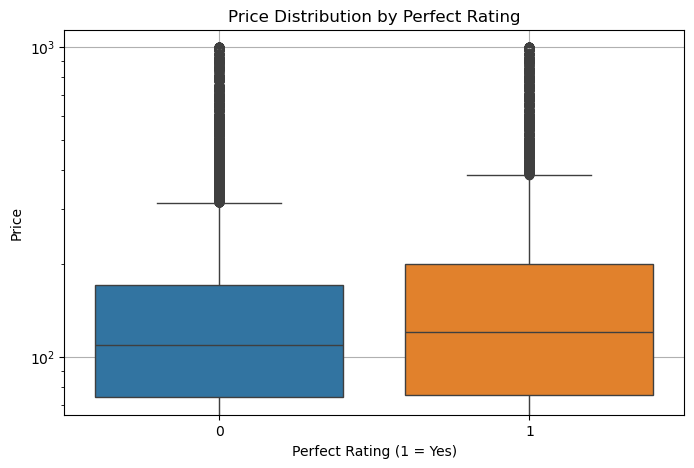

In [77]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.boxplot(x='perfect_rating_score', y='price', data=full_dataset, palette={'0': '#1f77b4', '1': '#ff7f0e'})
plt.title('Price Distribution by Perfect Rating')
plt.xlabel('Perfect Rating (1 = Yes)')
plt.ylabel('Price')
plt.yscale('log')  # if prices are skewed
plt.grid(True)
plt.show()

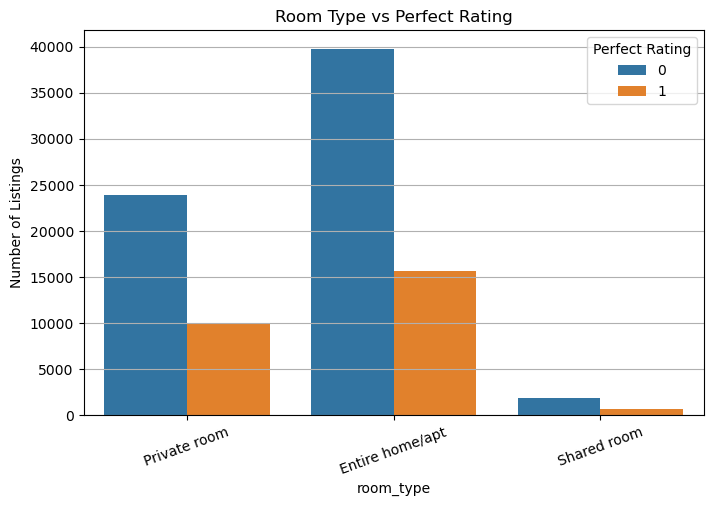

In [61]:
plt.figure(figsize=(8, 5))
sns.countplot(x='room_type', hue='perfect_rating_score', data=full_dataset)
plt.title('Room Type vs Perfect Rating')
plt.ylabel('Number of Listings')
plt.xticks(rotation=20)
plt.legend(title='Perfect Rating')
plt.grid(True, axis='y')
plt.show()

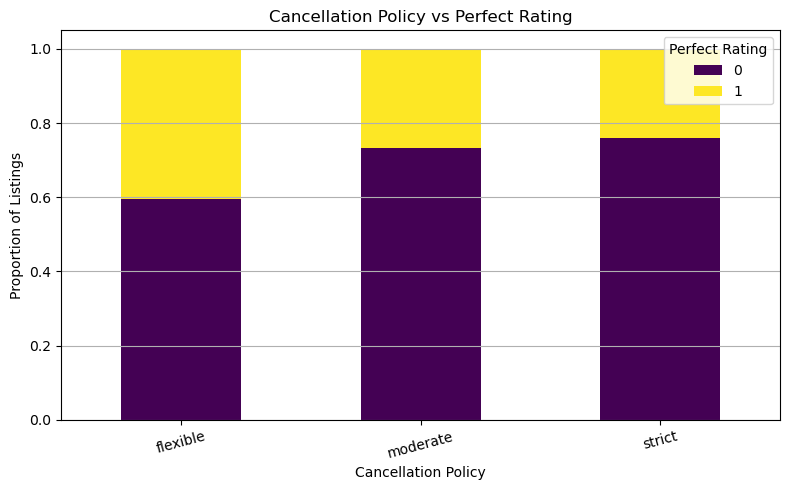

In [63]:
cancellation_counts = full_dataset.groupby(['cancellation_policy', 'perfect_rating_score']).size().unstack(fill_value=0)
cancellation_props = cancellation_counts.div(cancellation_counts.sum(axis=1), axis=0)

cancellation_props.plot(kind='bar', stacked=True, figsize=(8, 5), colormap='viridis')
plt.title('Cancellation Policy vs Perfect Rating')
plt.ylabel('Proportion of Listings')
plt.xlabel('Cancellation Policy')
plt.legend(title='Perfect Rating')
plt.xticks(rotation=15)
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

C:\Users\prana\AppData\Local\Temp\ipykernel_25092\2238525852.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='has_cleaning_fee', y='perfect_rating_score', data=full_dataset, palette={'YES': '#1f77b4', 'NO': '#ff7f0e'})


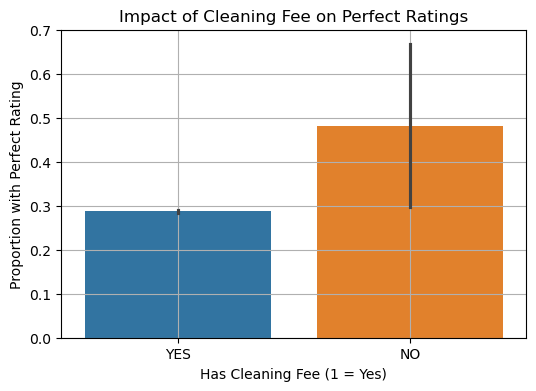

In [79]:
plt.figure(figsize=(6, 4))
sns.barplot(x='has_cleaning_fee', y='perfect_rating_score', data=full_dataset, palette={'YES': '#1f77b4', 'NO': '#ff7f0e'})
plt.title('Impact of Cleaning Fee on Perfect Ratings')
plt.xlabel('Has Cleaning Fee (1 = Yes)')
plt.ylabel('Proportion with Perfect Rating')
plt.grid(True)
plt.show()

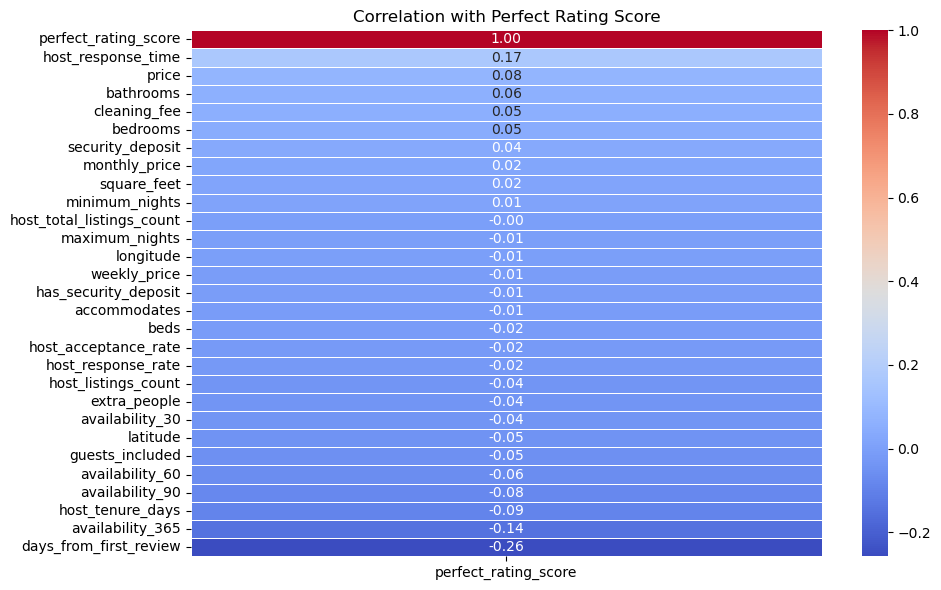

In [66]:
numeric_cols = full_dataset.select_dtypes(include='number')

corr = numeric_cols.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(corr[['perfect_rating_score']].sort_values(by='perfect_rating_score', ascending=False), 
            annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation with Perfect Rating Score')
plt.tight_layout()
plt.show()

# **Preprocessing Test Data**

In [173]:
test_X = pd.read_csv('airbnb_test_x.csv')
test_X

,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,...,maximum_nights,availability_30,availability_60,availability_90,availability_365,first_review,license,jurisdiction_names,cancellation_policy,features
0,Sophisticated Chic Designer Flat,NaN,"Beautiful, 2 bedroom, newly redecorated flat w...","Beautiful, 2 bedroom, newly redecorated flat w...",none,NaN,NaN,NaN,NaN,NaN,...,60,30,60,90,365,2015-08-02,NaN,SAN FRANCISCO,strict,"Host Has Profile Pic,Host Identity Verified,Is..."
1,Green Hills Condo,"My place is good for couples, solo adventurers...",This condo is close to everything you want in ...,"My place is good for couples, solo adventurers...",none,It's convenient to EVERYTHING.,When guests are not staying I do have a small ...,NaN,"You will have access to the entire condo, pool...",NaN,...,1125,0,3,11,11,2016-08-29,NaN,NaN,flexible,"Host Has Profile Pic,Host Identity Verified,Is..."
2,Private Room in Texas-Modern House off South 1st,"My house is a lovely, two-story house in South...",I have one bedroom for rent in a brand-new hou...,"My house is a lovely, two-story house in South...",none,"South Austin, and particularly the 78704 zip c...",This house regularly has a dog in residence. I...,The No. 5 and No. 10 buses both have stops wit...,You'll have access to the entire house (except...,Either my sister or I will be available should...,...,1125,0,0,0,0,2016-10-09,NaN,NaN,strict,"Host Has Profile Pic,Host Identity Verified,Is..."
3,"Save money, sleep well, and love NYC!","My place is close to Starbucks, supermarkets, ...",NaN,"My place is close to Starbucks, supermarkets, ...",none,NaN,NaN,NaN,NaN,NaN,...,10,30,60,90,365,2017-01-01,NaN,NaN,flexible,"Host Has Profile Pic,Is Location Exact,Instant..."
4,Cozy and roomy bedroom in Brooklyn - F line,"My place is quiet and green, perfect for work ...",NaN,"My place is quiet and green, perfect for work ...",none,NaN,NaN,NaN,- Kitchen - Living Room,Very friendly and will answer questions and gi...,...,60,0,0,0,0,2016-09-23,NaN,NaN,flexible,"Host Has Profile Pic,Host Identity Verified,Is..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,Spacious & Sunny Urban Treehouse,Sunny and spacious apartment located on the cu...,Enjoy your Brooklyn stay in the sublime master...,Sunny and spacious apartment located on the cu...,none,Apartment is situated on the cusp of BedStuy a...,NaN,We're a 5 minute walk to the Kingston-Throop C...,"Guests will have access to the master bedroom,...",I will be available in person to greet you and...,...,1125,0,0,0,0,2016-04-01,NaN,NaN,strict,"Host Has Profile Pic,Host Identity Verified,Is..."
9996,You're with Family!,"Furnished Private room, hardwood floors, Wi-fi...","The Room comes with a twin bed, night stand, D...","Furnished Private room, hardwood floors, Wi-fi...",none,"Quiet, friendly neighborhood, away from downto...",There is a pain management massage clinic loca...,"We have Uber, and taxi, but also allow for us ...","Access to wi-fi, kitchen, private bathroom",We invite you to join us for dinner - which we...,...,14,0,0,0,0,2015-04-12,NaN,NaN,strict,"Host Has Profile Pic,Host Identity Verified,Is..."
9997,Quiet Garden District Guest Cottage,Brand new modern guest home! We designed and b...,Our recently-constructed guest cottage is mode...,Brand new modern guest home! We designed and b...,none,We are in the middle of everything that New Or...,We prefer that you do not smoke on our propert...,There are numerous bus stops in very close wal...,You have access to the whole cottage space.,We are happy to share our recommendations! We ...,...,1125,13,40,70,160,2015-05-04,17STR-03912,"Louisiana State, New Orleans, LA",strict,"Host Is Superhost,Host Has Profile Pic,Host Id..."
9998,Large ATX Home Minutes to Downtown,This beautiful 3 bedroom 2.5 bath is in a very...,What could be better than a free bottle of win...,This beautiful 3 bedroom 2.5 bath is in a ve

In [175]:
test_X.isna().sum().sort_values(ascending=False).loc[lambda x: x > 0]

square_feet                  9810
license                      9078
host_acceptance_rate         8433
weekly_price                 8008
monthly_price                7628
neighborhood_group           6693
security_deposit             5342
notes                        5058
jurisdiction_names           5057
interaction                  3943
access                       3721
neighborhood_overview        3234
house_rules                  3088
transit                      3037
host_about                   3005
space                        2156
cleaning_fee                 2143
host_neighbourhood           1525
host_response_time           1444
host_response_rate           1444
summary                       339
zipcode                       116
price                          52
host_location                  39
amenities                      38
market                         35
bathrooms                      33
host_verifications             16
host_total_listings_count      15
host_since    

In [177]:
print(train_X['market'].value_counts())
print(test_X['market'].value_counts())

market
New York           27729
Los Angeles        20724
San Francisco       5985
Austin              5353
D.C.                5032
New Orleans         4042
Chicago             3978
San Diego           3889
Portland            2889
Seattle             2854
Nashville           2505
Boston              2479
Denver              1764
Other               1169
East Bay, CA        1138
Monterey Region      537
Name: count, dtype: int64
market
New York                       2982
Los Angeles                    2239
San Francisco                   651
Austin                          572
D.C.                            527
Chicago                         473
New Orleans                     440
San Diego                       419
Seattle                         317
Portland                        298
Boston                          286
Nashville                       250
Denver                          212
East Bay, CA                    152
Monterey Region                  56
Other (Domestic)    

In [179]:
test_X['host_response_rate']=test_X['host_response_rate']/100

test_X['host_acceptance_rate'] = (
    test_X['host_acceptance_rate']
    .astype(str)
    .str.rstrip('%')
    .replace('nan', np.nan)
    .astype(float)
)

test_X['host_acceptance_rate'] = test_X['host_acceptance_rate']/100

numerical_cols = test_X.select_dtypes(include=['int64', 'float64']).columns

for i in test_X.columns:
    if i in numerical_cols:
        test_X[i] = test_X[i].fillna(test_X[i].mean())
    else:
        test_X[i] = test_X[i].fillna("Not available")

test_X['property_category'] = test_X['property_type'].map(property_category_mapping).fillna('other')


test_X['cancellation_policy'] = test_X['cancellation_policy'].replace({'super_strict_30':'strict', 'super_strict_60':'strict', 'no_refunds':'strict'})

test_X['bed_category'] = test_X['bed_type'].map(bed_type_mapping).fillna('other')

market_counts_test = test_X['market'].value_counts()
test_X['market'] = test_X['market'].apply(lambda x: 'Other' if market_counts_test.get(x, 0) < 56 else x)


test_X['state'] = test_X['state'].astype('category')
test_X['state'] = test_X['state'].str.upper()

test_X['has_cleaning_fee'] = test_X['cleaning_fee'].apply(lambda x: 'YES' if x > 0 else 'NO')

test_X['days_from_first_review'] = (pd.to_datetime('today') - pd.to_datetime(test_X['first_review'])).dt.days/365
test_X['days_from_first_review']= test_X['days_from_first_review'].astype(int)


test_X['has_security_deposit'] = test_X['security_deposit'].apply(lambda x: 1 if x > 0 else 0)

test_X['host_since'] = pd.to_datetime(test_X['host_since'], errors='coerce')
test_X['host_tenure_days'] = (test_X['days_from_first_review'] + (pd.Timestamp.today() - test_X['host_since']).dt.days)
test_X['host_tenure_days'] = test_X['host_tenure_days'].fillna(test_X['host_tenure_days'].mean())

test_X['host_response_time'] = test_X['host_response_time'].map(response_time_map)

In [181]:
test_X.isna().sum().loc[lambda x: x>0]

host_since    15
dtype: int64

In [183]:
len(test_X.columns)

67

In [185]:
test_X.columns

Index(['name', 'summary', 'space', 'description', 'experiences_offered',
       'neighborhood_overview', 'notes', 'transit', 'access', 'interaction',
       'house_rules', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications', 'street',
       'neighborhood', 'neighborhood_group', 'city', 'state', 'zipcode',
       'market', 'smart_location', 'country_code', 'country', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bedrooms', 'beds', 'bed_type', 'amenities', 'square_feet', 'price',
       'weekly_price', 'monthly_price', 'security_deposit', 'cleaning_fee',
       'guests_included', 'extra_people', 'minimum_nights', 'maximum_nights',
       'availability_30', 'availability_60', 'availability_90',
       'availability_365', 'first_review', 'license', '

In [ ]:
#test_X.to_csv('preprocessed_test_x.csv', index=False)

# **Prediction on training data - Logistic Regression**

In [157]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report
from scipy.sparse import hstack, csr_matrix
import numpy as np

logreg_features = [
    'accommodates', 'availability_30', 'availability_365', 'bathrooms',
    'bed_category', 'cancellation_policy', 'has_cleaning_fee', 'host_response_time',
    'host_response_rate', 'host_acceptance_rate', 'host_listings_count',
    'host_tenure_days', 'minimum_nights', 'price', 'monthly_price',
    'host_verifications', 'property_category', 'room_type',
    'has_security_deposit', 'days_from_first_review'
]

X = full_dataset[logreg_features].copy()
y = full_dataset['perfect_rating_score']

cat_cols = X.select_dtypes(include='object').columns.tolist()
ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
X_cat = ohe.fit_transform(X[cat_cols])
X_num = csr_matrix(X.drop(columns=cat_cols).astype(float).values)
X_encoded = hstack([X_num, csr_matrix(X_cat)])

X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.3, stratify=y, random_state=42
)

logreg_model = LogisticRegression(max_iter=1000)
logreg_model.fit(X_train, y_train)

y_probs = logreg_model.predict_proba(X_test)[:, 1]
y_pred = (y_probs >= 0.5).astype(int)

tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
acc = (tp + tn) / (tp + tn + fp + fn)
tpr = tp / (tp + fn)
fpr = fp / (fp + tn)

print("CONFUSION MATRIX:")
print(confusion_matrix(y_test, y_pred))
print("\nCLASSIFICATION REPORT:")
print(classification_report(y_test, y_pred, digits=4))
print(f"\nAccuracy    : {acc:.4f}")
print(f"TPR (Recall): {tpr:.4f}")
print(f"FPR         : {fpr:.4f}")

CONFUSION MATRIX:
[[18498  1189]
 [ 6372  1562]]

CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           0     0.7438    0.9396    0.8303     19687
           1     0.5678    0.1969    0.2924      7934

    accuracy                         0.7263     27621
   macro avg     0.6558    0.5682    0.5613     27621
weighted avg     0.6932    0.7263    0.6758     27621


Accuracy    : 0.7263
TPR (Recall): 0.1969
FPR         : 0.0604


In [158]:
c_values = [0.01, 0.1, 1, 10, 100]
results = []

for c in c_values:
    model = LogisticRegression(C=c, max_iter=1000)
    model.fit(X_train, y_train)
    y_probs = model.predict_proba(X_test)[:, 1]
    y_pred = (y_probs >= 0.78).astype(int)

    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    acc = (tp + tn) / (tp + tn + fp + fn)
    tpr = tp / (tp + fn)
    fpr = fp / (fp + tn)

    results.append({'C': c, 'TPR': round(tpr, 4), 'FPR': round(fpr, 4), 'Accuracy': round(acc, 4)})

import pandas as pd
tuning_results_df = pd.DataFrame(results)
print(tuning_results_df)

        C     TPR     FPR  Accuracy
0    0.01  0.0108  0.0022    0.7143
1    0.10  0.0077  0.0018    0.7137
2    1.00  0.0096  0.0022    0.7139
3   10.00  0.0125  0.0019    0.7150
4  100.00  0.0124  0.0029    0.7142


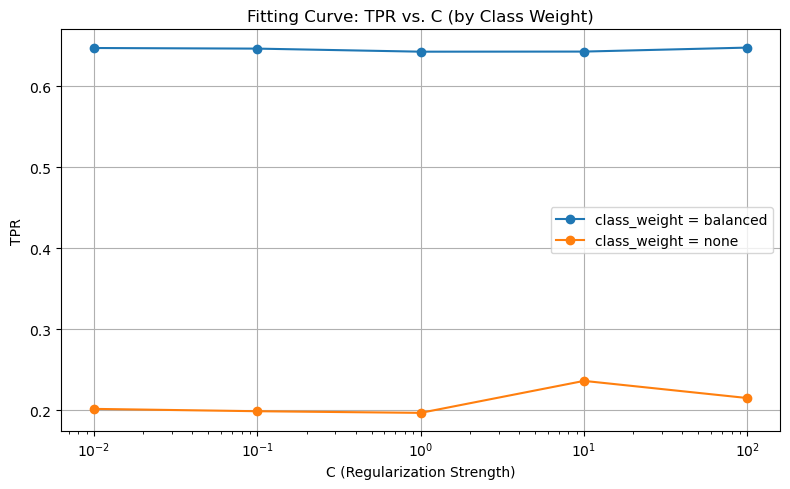

In [159]:
c_values = [0.01, 0.1, 1, 10, 100]
class_weights = [None, 'balanced']

results = []

for c in c_values:
    for weight in class_weights:
        model = LogisticRegression(C=c, class_weight=weight, max_iter=1000)
        model.fit(X_train, y_train)
        y_probs = model.predict_proba(X_test)[:, 1]
        y_pred = (y_probs >= 0.5).astype(int)

        tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
        tpr = tp / (tp + fn)
        fpr = fp / (fp + tn)
        acc = (tp + tn) / (tp + tn + fp + fn)

        results.append({
            'C': c,
            'class_weight': 'balanced' if weight == 'balanced' else 'none',
            'TPR': tpr,
            'FPR': fpr,
            'Accuracy': acc
        })

cw_df = pd.DataFrame(results)

pivot_df = cw_df.pivot(index='C', columns='class_weight', values='TPR')

plt.figure(figsize=(8, 5))
for weight in pivot_df.columns:
    plt.plot(pivot_df.index, pivot_df[weight], marker='o', label=f'class_weight = {weight}')
plt.xscale('log')
plt.xlabel('C (Regularization Strength)')
plt.ylabel('TPR')
plt.title('Fitting Curve: TPR vs. C (by Class Weight)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

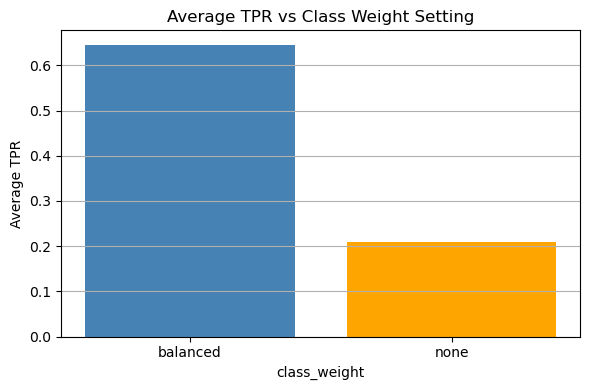

In [98]:
summary_df = cw_df.groupby('class_weight')['TPR'].mean().reset_index()

plt.figure(figsize=(6, 4))
plt.bar(summary_df['class_weight'], summary_df['TPR'], color=['steelblue', 'orange'])
plt.xlabel('class_weight')
plt.ylabel('Average TPR')
plt.title('Average TPR vs Class Weight Setting')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [102]:
print(cw_df.round(4))

        C class_weight     TPR     FPR  Accuracy
0    0.01         none  0.2018  0.0615    0.7269
1    0.01     balanced  0.6471  0.3218    0.6692
2    0.10         none  0.1989  0.0588    0.7280
3    0.10     balanced  0.6463  0.3195    0.6707
4    1.00         none  0.1969  0.0604    0.7263
5    1.00     balanced  0.6426  0.3205    0.6689
6   10.00         none  0.2363  0.0710    0.7300
7   10.00     balanced  0.6427  0.3208    0.6687
8  100.00         none  0.2151  0.0656    0.7278
9  100.00     balanced  0.6476  0.3212    0.6699


   Threshold       TPR       FPR
0       0.50  0.215150  0.065576
1       0.60  0.097555  0.026261
2       0.70  0.036552  0.007467
3       0.75  0.018402  0.003962
4       0.78  0.012352  0.002946
5       0.80  0.009957  0.002286
6       0.85  0.005168  0.001117
7       0.90  0.001639  0.000508


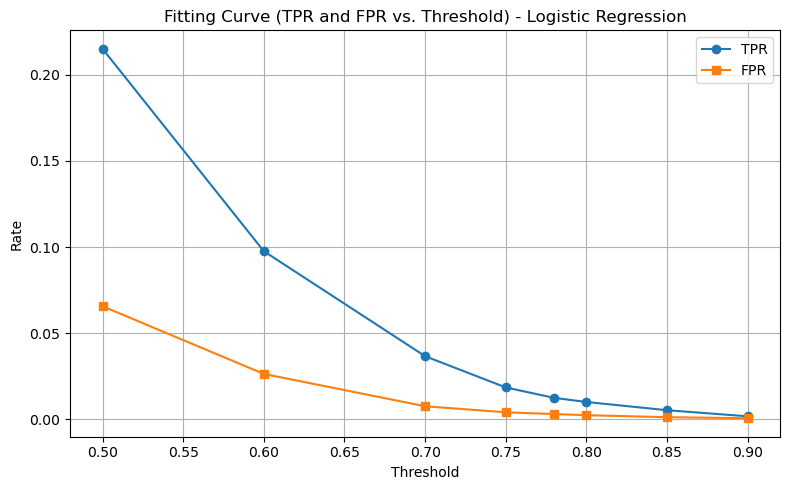

In [94]:
import matplotlib.pyplot as plt

thresholds = [0.5, 0.6, 0.7, 0.75, 0.78, 0.8, 0.85, 0.9]
curve_results = []

for t in thresholds:
    y_pred = (y_probs >= t).astype(int)
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    tpr = tp / (tp + fn)
    fpr = fp / (fp + tn)
    curve_results.append((t, tpr, fpr))

curve_df = pd.DataFrame(curve_results, columns=["Threshold", "TPR", "FPR"])
print(curve_df)

plt.figure(figsize=(8, 5))
plt.plot(curve_df["Threshold"], curve_df["TPR"], label="TPR", marker='o')
plt.plot(curve_df["Threshold"], curve_df["FPR"], label="FPR", marker='s')
plt.xlabel("Threshold")
plt.ylabel("Rate")
plt.title("Fitting Curve (TPR and FPR vs. Threshold) - Logistic Regression")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# **Prediction on training data - Random Forest**

In [108]:
rf_features = [
    'accommodates', 'availability_30', 'availability_365', 'bathrooms',
    'bed_category', 'cancellation_policy', 'has_cleaning_fee', 'host_response_time',
    'host_response_rate', 'host_acceptance_rate', 'host_listings_count',
    'host_tenure_days', 'minimum_nights', 'price', 'monthly_price',
    'host_verifications', 'property_category', 'room_type',
    'has_security_deposit', 'days_from_first_review'
]

X = full_dataset[rf_features].copy()
y = full_dataset['perfect_rating_score']

cat_cols = X.select_dtypes(include='object').columns.tolist()
ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
X_cat = ohe.fit_transform(X[cat_cols])
X_num = csr_matrix(X.drop(columns=cat_cols).astype(float).values)
X_encoded = hstack([X_num, csr_matrix(X_cat)])

X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.3, stratify=y, random_state=42
)

rf_model = RandomForestClassifier(n_estimators=100, max_depth=None, random_state=42)
rf_model.fit(X_train, y_train)

y_probs = rf_model.predict_proba(X_test)[:, 1]
y_pred = (y_probs >= 0.5).astype(int)

tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
tpr = tp / (tp + fn)
fpr = fp / (fp + tn)
acc = (tp + tn) / (tp + tn + fp + fn)

print("CONFUSION MATRIX:")
print(confusion_matrix(y_test, y_pred))
print("\nCLASSIFICATION REPORT:")
print(classification_report(y_test, y_pred, digits=4))
print(f"\nAccuracy    : {acc:.4f}")
print(f"TPR (Recall): {tpr:.4f}")
print(f"FPR         : {fpr:.4f}")

CONFUSION MATRIX:
[[17911  1776]
 [ 5579  2355]]

CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           0     0.7625    0.9098    0.8297     19687
           1     0.5701    0.2968    0.3904      7934

    accuracy                         0.7337     27621
   macro avg     0.6663    0.6033    0.6100     27621
weighted avg     0.7072    0.7337    0.7035     27621


Accuracy    : 0.7337
TPR (Recall): 0.2968
FPR         : 0.0902


In [110]:
n_estimators_list = [100, 200, 300]
max_depth_list = [None, 10, 20]

tuning_results = []

for n in n_estimators_list:
    for d in max_depth_list:
        model = RandomForestClassifier(n_estimators=n, max_depth=d, random_state=42)
        model.fit(X_train, y_train)
        y_probs = model.predict_proba(X_test)[:, 1]
        y_pred = (y_probs >= 0.5).astype(int)

        tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
        tpr = tp / (tp + fn)
        fpr = fp / (fp + tn)
        acc = (tp + tn) / (tp + tn + fp + fn)

        tuning_results.append({
            'n_estimators': n,
            'max_depth': 'None' if d is None else d,
            'TPR': round(tpr, 4),
            'FPR': round(fpr, 4),
            'Accuracy': round(acc, 4)
        })

rf_tuning_df = pd.DataFrame(tuning_results)
print(rf_tuning_df)

   n_estimators max_depth     TPR     FPR  Accuracy
0           100      None  0.2968  0.0902    0.7337
1           100        10  0.0092  0.0010    0.7147
2           100        20  0.1107  0.0255    0.7264
3           200      None  0.2851  0.0857    0.7336
4           200        10  0.0057  0.0007    0.7139
5           200        20  0.1110  0.0250    0.7268
6           300      None  0.2837  0.0839    0.7345
7           300        10  0.0073  0.0008    0.7143
8           300        20  0.1094  0.0250    0.7263


   Threshold     TPR     FPR
0       0.50  0.2968  0.0902
1       0.60  0.1253  0.0339
2       0.70  0.0416  0.0093
3       0.75  0.0227  0.0043
4       0.80  0.0096  0.0020
5       0.85  0.0035  0.0008
6       0.90  0.0011  0.0003


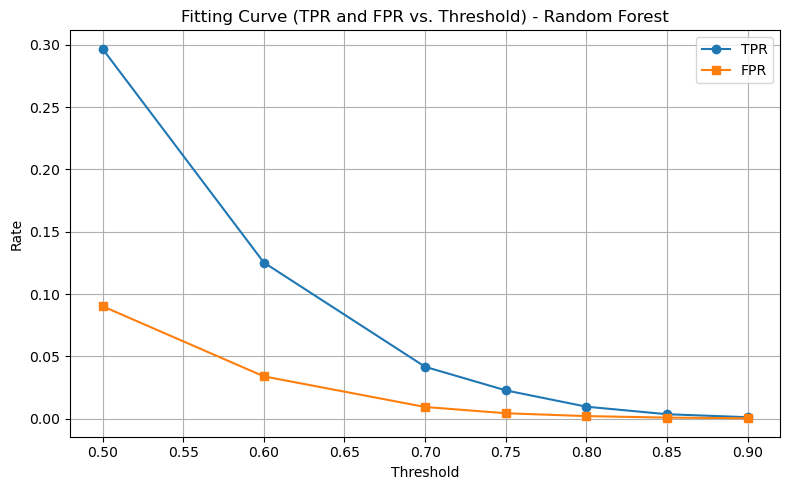

In [114]:
y_probs = rf_model.predict_proba(X_test)[:, 1]

thresholds = [0.5, 0.6, 0.7, 0.75, 0.8, 0.85, 0.9]
curve_results = []

for t in thresholds:
    y_pred = (y_probs >= t).astype(int)
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    tpr = tp / (tp + fn)
    fpr = fp / (fp + tn)
    curve_results.append((t, tpr, fpr))

# Convert to DataFrame
curve_df = pd.DataFrame(curve_results, columns=["Threshold", "TPR", "FPR"])
print(curve_df.round(4))

# Plotting
plt.figure(figsize=(8, 5))
plt.plot(curve_df["Threshold"], curve_df["TPR"], label="TPR", marker='o')
plt.plot(curve_df["Threshold"], curve_df["FPR"], label="FPR", marker='s')
plt.xlabel("Threshold")
plt.ylabel("Rate")
plt.title("Fitting Curve (TPR and FPR vs. Threshold) - Random Forest")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# **Prediction on training data - XGBoost**

In [116]:
full_dataset.columns

Index(['name', 'summary', 'space', 'description', 'experiences_offered',
       'neighborhood_overview', 'notes', 'transit', 'access', 'interaction',
       'house_rules', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications', 'street',
       'neighborhood', 'neighborhood_group', 'city', 'state', 'zipcode',
       'market', 'smart_location', 'country_code', 'country', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bedrooms', 'beds', 'bed_type', 'amenities', 'square_feet', 'price',
       'weekly_price', 'monthly_price', 'security_deposit', 'cleaning_fee',
       'guests_included', 'extra_people', 'minimum_nights', 'maximum_nights',
       'availability_30', 'availability_60', 'availability_90',
       'availability_365', 'first_review', 'license', '

In [118]:
full_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92067 entries, 0 to 92066
Data columns (total 69 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   name                       92067 non-null  object        
 1   summary                    92067 non-null  object        
 2   space                      92067 non-null  object        
 3   description                92067 non-null  object        
 4   experiences_offered        92067 non-null  object        
 5   neighborhood_overview      92067 non-null  object        
 6   notes                      92067 non-null  object        
 7   transit                    92067 non-null  object        
 8   access                     92067 non-null  object        
 9   interaction                92067 non-null  object        
 10  house_rules                92067 non-null  object        
 11  host_name                  92067 non-null  object        
 12  host

In [197]:
fields_considered_v1 = [
    'accommodates',
    'availability_30',
    'availability_60',
    'availability_90',
    'availability_365',
    'bathrooms',
    'bed_category',
    'bedrooms',
    'beds',
    'cancellation_policy',
    'cleaning_fee',
    'extra_people',
    'guests_included',
    'host_acceptance_rate',
    'host_listings_count',
    'host_response_rate',
    'host_response_time',
    'host_total_listings_count',
    'host_tenure_days',
    'minimum_nights',
    'price',
    'property_category',
    'room_type',
    'square_feet',
    'weekly_price',
    'has_cleaning_fee',
    'has_security_deposit',
    'days_from_first_review',
    'perfect_rating_score'
]

In [122]:
!pip install xgboost

In [199]:
from xgboost import XGBClassifier

dataset = full_dataset[fields_considered_v1].copy()
X = dataset.drop(columns='perfect_rating_score')
y = dataset['perfect_rating_score']

cat_cols = X.select_dtypes(include='object').columns.tolist()
ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=True)
X_cat = ohe.fit_transform(X[cat_cols])
X_num = csr_matrix(X.drop(columns=cat_cols).astype(float).values)
X_encoded = hstack([X_num, X_cat])

X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.3, random_state=42, stratify=y
)

xgb_model = XGBClassifier(
    use_label_encoder=False,
    eval_metric='logloss',
    n_estimators=100,
    max_depth=6,
    learning_rate=0.1,
    scale_pos_weight=(y_train == 0).sum() / (y_train == 1).sum(),
    n_jobs=-1,
    random_state=42
)
xgb_model.fit(X_train, y_train)

def compute_metrics(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    acc = (tp + tn) / (tp + tn + fp + fn)
    tpr = tp / (tp + fn) if (tp + fn) > 0 else 0
    fpr = fp / (fp + tn) if (fp + tn) > 0 else 0
    return round(acc, 4), round(tpr, 4), round(fpr, 4)

y_train_pred = xgb_model.predict(X_train)
y_test_pred = xgb_model.predict(X_test)

train_acc, train_tpr, train_fpr = compute_metrics(y_train, y_train_pred)
test_acc, test_tpr, test_fpr = compute_metrics(y_test, y_test_pred)

print("\n" + "="*30)
print("TRAINING SET PERFORMANCE")
print("="*30)
print(confusion_matrix(y_train, y_train_pred))
print(classification_report(y_train, y_train_pred, digits=4))
print(f"TPR (Recall): {train_tpr:.4f}")
print(f"FPR         : {train_fpr:.4f}")
print(f"Accuracy    : {train_acc:.4f}")

print("\n" + "="*30)
print("VALIDATION SET PERFORMANCE")
print("="*30)
print(confusion_matrix(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred, digits=4))
print(f"TPR (Recall): {test_tpr:.4f}")
print(f"FPR         : {test_fpr:.4f}")
print(f"Accuracy    : {test_acc:.4f}")


TRAINING SET PERFORMANCE
[[31451 14482]
 [ 3568 14945]]
              precision    recall  f1-score   support

           0     0.8981    0.6847    0.7770     45933
           1     0.5079    0.8073    0.6235     18513

    accuracy                         0.7199     64446
   macro avg     0.7030    0.7460    0.7003     64446
weighted avg     0.7860    0.7199    0.7329     64446

TPR (Recall): 0.8073
FPR         : 0.3153
Accuracy    : 0.7199

VALIDATION SET PERFORMANCE
[[13085  6602]
 [ 1983  5951]]
              precision    recall  f1-score   support

           0     0.8684    0.6647    0.7530     19687
           1     0.4741    0.7501    0.5810      7934

    accuracy                         0.6892     27621
   macro avg     0.6712    0.7074    0.6670     27621
weighted avg     0.7551    0.6892    0.7036     27621

TPR (Recall): 0.7501
FPR         : 0.3353
Accuracy    : 0.6892


In [201]:
import itertools

param_grid = {
    'n_estimators': [100, 300],
    'max_depth': [3, 5],
    'learning_rate': [0.1, 0.2],
    'min_child_weight': [1, 3]
}

param_combinations = list(itertools.product(
    param_grid['n_estimators'],
    param_grid['max_depth'],
    param_grid['learning_rate'],
    param_grid['min_child_weight']
))

results = []

for n_est, depth, lr, mcw in param_combinations:
    model = XGBClassifier(
        use_label_encoder=False,
        eval_metric='logloss',
        scale_pos_weight=(y_train == 0).sum() / (y_train == 1).sum(),
        n_estimators=n_est,
        max_depth=depth,
        learning_rate=lr,
        min_child_weight=mcw,
        n_jobs=-1,
        random_state=42
    )
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    acc = (tp + tn) / (tp + tn + fp + fn)
    tpr = tp / (tp + fn) if (tp + fn) else 0
    fpr = fp / (fp + tn) if (fp + tn) else 0

    results.append({
        'n_estimators': n_est,
        'max_depth': depth,
        'learning_rate': lr,
        'min_child_weight': mcw,
        'Accuracy': round(acc, 4),
        'TPR': round(tpr, 4),
        'FPR': round(fpr, 4)
    })

tuning_df = pd.DataFrame(results).sort_values(by='TPR', ascending=False)
print(tuning_df)

    n_estimators  max_depth  learning_rate  min_child_weight  Accuracy  \
1            100          3            0.1                 3    0.6777   
0            100          3            0.1                 1    0.6789   
5            100          5            0.1                 3    0.6862   
4            100          5            0.1                 1    0.6874   
3            100          3            0.2                 3    0.6863   
2            100          3            0.2                 1    0.6851   
8            300          3            0.1                 1    0.6874   
9            300          3            0.1                 3    0.6866   
6            100          5            0.2                 1    0.6918   
11           300          3            0.2                 3    0.6902   
7            100          5            0.2                 3    0.6901   
10           300          3            0.2                 1    0.6894   
13           300          5           

In [203]:
top_5_params = [
    {'n_estimators': 300, 'max_depth': 5, 'learning_rate': 0.2, 'min_child_weight': 3},
    {'n_estimators': 300, 'max_depth': 5, 'learning_rate': 0.2, 'min_child_weight': 1},
    {'n_estimators': 300, 'max_depth': 5, 'learning_rate': 0.1, 'min_child_weight': 3},
    {'n_estimators': 300, 'max_depth': 5, 'learning_rate': 0.1, 'min_child_weight': 1},
    {'n_estimators': 100, 'max_depth': 5, 'learning_rate': 0.2, 'min_child_weight': 1}
]

thresholds = [0.3, 0.4, 0.5, 0.6, 0.7]
evaluation_results = []

for i, params in enumerate(top_5_params):
    model = XGBClassifier(
        eval_metric='logloss',
        scale_pos_weight=(y_train == 0).sum() / (y_train == 1).sum(),
        n_jobs=-1,
        random_state=42,
        **params
    )
    model.fit(X_train, y_train)
    y_probs = model.predict_proba(X_test)[:, 1]

    for t in thresholds:
        y_pred = (y_probs >= t).astype(int)
        tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
        acc = (tp + tn) / (tp + tn + fp + fn)
        tpr = tp / (tp + fn) if (tp + fn) else 0
        fpr = fp / (fp + tn) if (fp + tn) else 0

        evaluation_results.append({
            'Model #': i + 1,
            'Threshold': t,
            'Accuracy': round(acc, 4),
            'TPR': round(tpr, 4),
            'FPR': round(fpr, 4),
            'Params': params
        })

threshold_eval_df = pd.DataFrame(evaluation_results)
threshold_eval_df = threshold_eval_df.sort_values(by=['FPR', 'TPR'], ascending=[True, False])
print(threshold_eval_df)

    Model #  Threshold  Accuracy     TPR     FPR  \
14        3        0.7    0.7480  0.3784  0.1030   
19        4        0.7    0.7473  0.3799  0.1047   
24        5        0.7    0.7459  0.3776  0.1057   
9         2        0.7    0.7439  0.3809  0.1099   
4         1        0.7    0.7431  0.3799  0.1105   
8         2        0.6    0.7291  0.5776  0.2099   
3         1        0.6    0.7292  0.5797  0.2106   
18        4        0.6    0.7300  0.5914  0.2142   
13        3        0.6    0.7301  0.5935  0.2148   
23        5        0.6    0.7291  0.5994  0.2187   
2         1        0.5    0.6975  0.7228  0.3126   
7         2        0.5    0.6984  0.7260  0.3127   
17        4        0.5    0.6935  0.7436  0.3268   
12        3        0.5    0.6931  0.7446  0.3276   
22        5        0.5    0.6918  0.7517  0.3324   
6         2        0.4    0.6536  0.8186  0.4129   
1         1        0.4    0.6520  0.8190  0.4152   
16        4        0.4    0.6461  0.8433  0.4334   
11        3 

In [204]:
fields_considered_v2 = [
    'accommodates',
    'availability_30',
    'availability_365',
    'bathrooms',
    'bed_category',
    'cancellation_policy',
    'has_cleaning_fee',
    'host_response_time',
    'host_response_rate',
    'host_acceptance_rate',
    'host_listings_count',
    'host_tenure_days',
    'minimum_nights',
    'price',
    'monthly_price',
    'host_verifications',
    'property_category',
    'room_type',
    'has_security_deposit',
    'days_from_first_review',
    'perfect_rating_score'
]

In [207]:
dataset = full_dataset[fields_considered_v2].copy()

X = dataset.drop(columns='perfect_rating_score')
y = dataset['perfect_rating_score']

# One-hot encode categorical variables
cat_cols = X.select_dtypes(include='object').columns.tolist()
if cat_cols:
    ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
    X_cat = ohe.fit_transform(X[cat_cols])
    X_num = csr_matrix(X.drop(columns=cat_cols).astype(float).values)
    X_encoded = hstack([X_num, csr_matrix(X_cat)])
else:
    X_encoded = csr_matrix(X.astype(float).values)

X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.3, random_state=42, stratify=y
)

xgb_model_v2 = XGBClassifier(
    eval_metric='logloss',
    n_estimators=300,
    max_depth=3,
    min_child_weight=7,
    learning_rate=0.2,
    scale_pos_weight=(y_train == 0).sum() / (y_train == 1).sum(),
    n_jobs=-1,
    random_state=42
)
xgb_model_v2.fit(X_train, y_train)

y_probs = xgb_model_v2.predict_proba(X_test)[:, 1]
y_pred = (y_probs >= 0.70).astype(int)

tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
acc = (tp + tn) / (tp + tn + fp + fn)
tpr = tp / (tp + fn)
fpr = fp / (fp + tn)

print("CONFUSION MATRIX:")
print(confusion_matrix(y_test, y_pred))
print("\nCLASSIFICATION REPORT:")
print(classification_report(y_test, y_pred, digits=4))
print(f"\nAccuracy    : {acc:.4f}")
print(f"TPR (Recall): {tpr:.4f}")
print(f"FPR         : {fpr:.4f}")

CONFUSION MATRIX:
[[17632  2055]
 [ 4929  3005]]

CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           0     0.7815    0.8956    0.8347     19687
           1     0.5939    0.3787    0.4625      7934

    accuracy                         0.7471     27621
   macro avg     0.6877    0.6372    0.6486     27621
weighted avg     0.7276    0.7471    0.7278     27621


Accuracy    : 0.7471
TPR (Recall): 0.3787
FPR         : 0.1044


In [209]:
y_probs = xgb_model_v2.predict_proba(X_test)[:, 1]
y_pred = (y_probs >= 0.75).astype(int)

tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
acc = (tp + tn) / (tp + tn + fp + fn)
tpr = tp / (tp + fn)
fpr = fp / (fp + tn)

print("CONFUSION MATRIX:")
print(confusion_matrix(y_test, y_pred))
print("\nCLASSIFICATION REPORT:")
print(classification_report(y_test, y_pred, digits=4))
print(f"\nAccuracy    : {acc:.4f}")
print(f"TPR (Recall): {tpr:.4f}")
print(f"FPR         : {fpr:.4f}")

CONFUSION MATRIX:
[[18495  1192]
 [ 5898  2036]]

CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           0     0.7582    0.9395    0.8392     19687
           1     0.6307    0.2566    0.3648      7934

    accuracy                         0.7433     27621
   macro avg     0.6945    0.5980    0.6020     27621
weighted avg     0.7216    0.7433    0.7029     27621


Accuracy    : 0.7433
TPR (Recall): 0.2566
FPR         : 0.0605


In [211]:
y_probs = xgb_model_v2.predict_proba(X_test)[:, 1]
y_pred = (y_probs >= 0.8).astype(int)

tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
acc = (tp + tn) / (tp + tn + fp + fn)
tpr = tp / (tp + fn)
fpr = fp / (fp + tn)

print("CONFUSION MATRIX:")
print(confusion_matrix(y_test, y_pred))
print("\nCLASSIFICATION REPORT:")
print(classification_report(y_test, y_pred, digits=4))
print(f"\nAccuracy    : {acc:.4f}")
print(f"TPR (Recall): {tpr:.4f}")
print(f"FPR         : {fpr:.4f}")

CONFUSION MATRIX:
[[19133   554]
 [ 6734  1200]]

CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           0     0.7397    0.9719    0.8400     19687
           1     0.6842    0.1512    0.2477      7934

    accuracy                         0.7361     27621
   macro avg     0.7119    0.5616    0.5439     27621
weighted avg     0.7237    0.7361    0.6699     27621


Accuracy    : 0.7361
TPR (Recall): 0.1512
FPR         : 0.0281


In [213]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

fpr, tpr, thresholds = roc_curve(y_test, y_probs)

mask = fpr <= 0.04
filtered_fpr = fpr[mask]
filtered_tpr = tpr[mask]
filtered_thresholds = thresholds[mask]

best_idx = np.argmax(filtered_tpr)
best_threshold = filtered_thresholds[best_idx]
best_tpr = filtered_tpr[best_idx]
best_fpr = filtered_fpr[best_idx]

print(f"Best threshold (FPR ≤ 5%): {best_threshold:.4f}")
print(f"Expected TPR at this threshold: {best_tpr:.4f}")
print(f"Expected FPR at this threshold: {best_fpr:.4f}")

Best threshold (FPR ≤ 5%): 0.7786
Expected TPR at this threshold: 0.1940
Expected FPR at this threshold: 0.0400


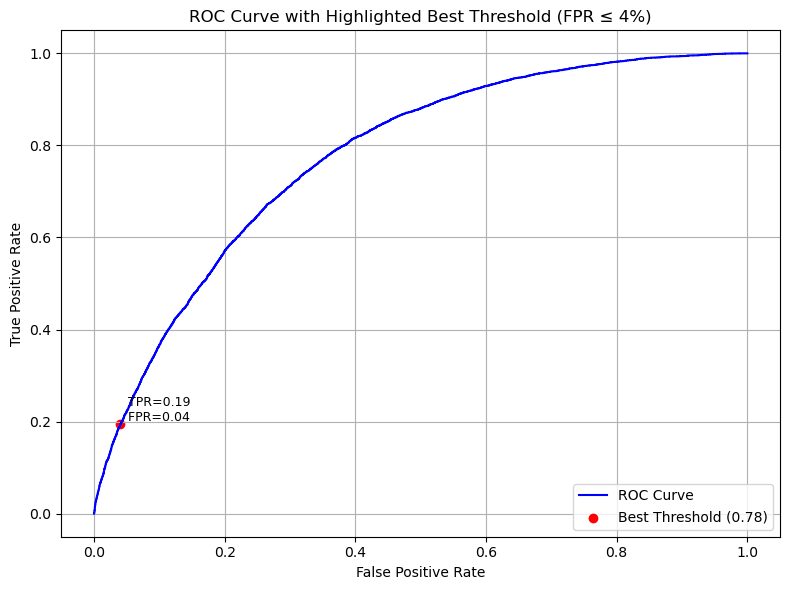

In [140]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label="ROC Curve", color='blue')

plt.scatter(best_fpr, best_tpr, color='red', label=f'Best Threshold ({best_threshold:.2f})')
plt.text(best_fpr, best_tpr, f"  TPR={best_tpr:.2f}\n  FPR={best_fpr:.2f}", fontsize=9, verticalalignment='bottom')

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve with Highlighted Best Threshold (FPR ≤ 4%)")
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()

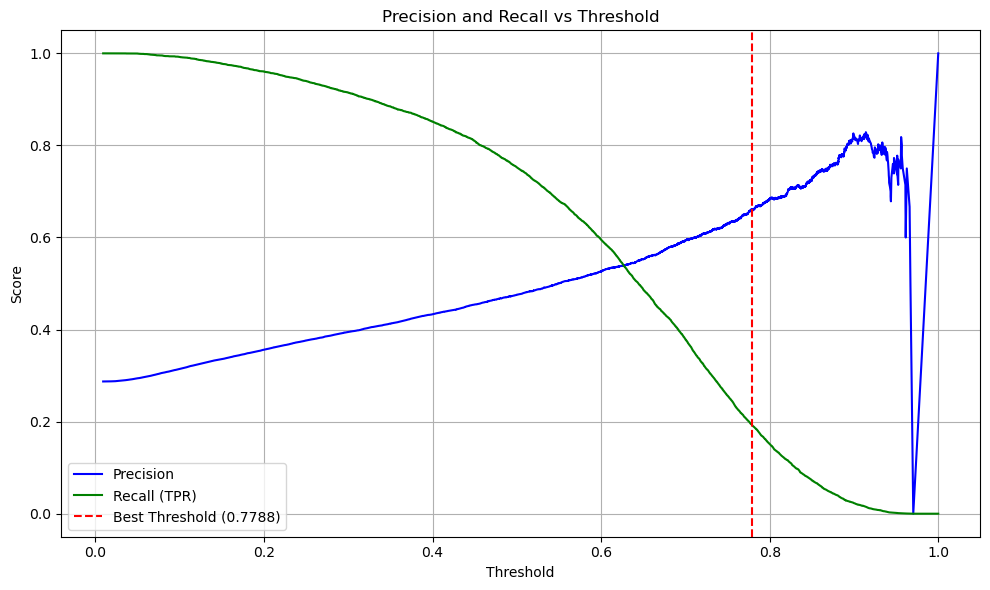

In [142]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
import numpy as np

precision, recall, thresholds = precision_recall_curve(y_test, y_probs)

thresholds = np.append(thresholds, 1.0)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(thresholds, precision, label='Precision', color='blue')
plt.plot(thresholds, recall, label='Recall (TPR)', color='green')
plt.axvline(x=0.7788, color='red', linestyle='--', label='Best Threshold (0.7788)')
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.title("Precision and Recall vs Threshold")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

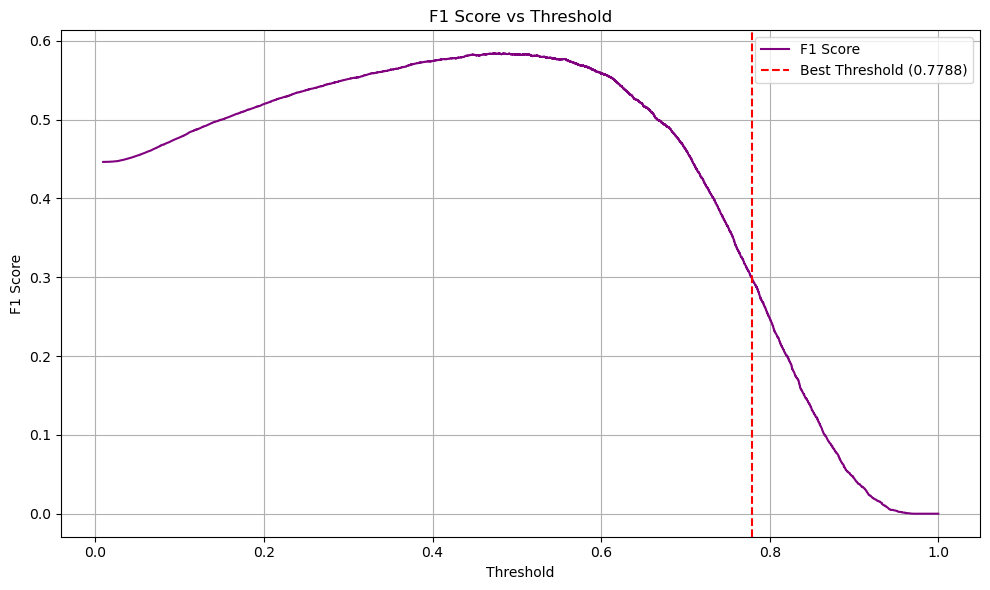

In [144]:
f1_scores = 2 * (precision * recall) / (precision + recall + 1e-6)  

# Plot
plt.figure(figsize=(10, 6))
plt.plot(thresholds, f1_scores, label='F1 Score', color='purple')
plt.axvline(x=0.7788, color='red', linestyle='--', label='Best Threshold (0.7788)')
plt.xlabel("Threshold")
plt.ylabel("F1 Score")
plt.title("F1 Score vs Threshold")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

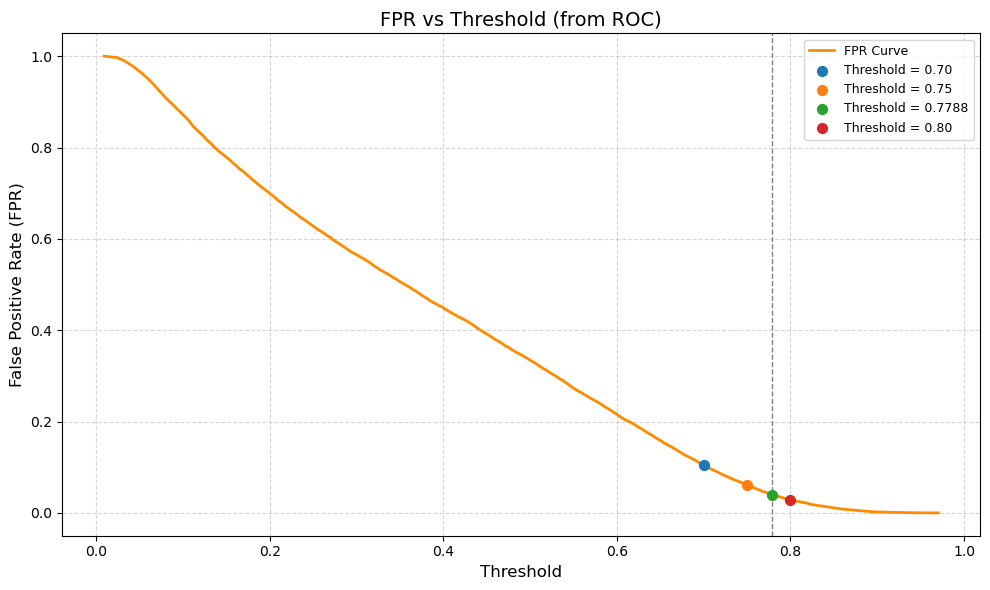

In [153]:
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

thresholds = thresholds[:len(fpr)]

plt.figure(figsize=(10, 6))
plt.plot(thresholds, fpr[:len(thresholds)], color='darkorange', label='FPR Curve', linewidth=2)

highlight_thresholds = [0.70, 0.75, 0.7788, 0.80]
highlight_labels = ['Threshold = 0.70', 'Threshold = 0.75', 'Threshold = 0.7788', 'Threshold = 0.80']
highlight_fpr = [fpr[np.argmin(np.abs(thresholds - t))] for t in highlight_thresholds]

for t, f, label in zip(highlight_thresholds, highlight_fpr, highlight_labels):
    plt.scatter(t, f, s=50, label=label, zorder=5)

plt.axvline(x=0.7788, color='gray', linestyle='--', linewidth=1)

plt.xlabel('Threshold', fontsize=12)
plt.ylabel('False Positive Rate (FPR)', fontsize=12)
plt.title('FPR vs Threshold (from ROC)', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(loc='upper right', fontsize=9)
plt.tight_layout()
plt.show()

In [215]:
y_probs = xgb_model_v2.predict_proba(X_test)[:, 1]
y_pred = (y_probs >= 0.78).astype(int)

tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
acc = (tp + tn) / (tp + tn + fp + fn)
tpr = tp / (tp + fn)
fpr = fp / (fp + tn)

print("CONFUSION MATRIX:")
print(confusion_matrix(y_test, y_pred))
print("\nCLASSIFICATION REPORT:")
print(classification_report(y_test, y_pred, digits=4))
print(f"\nAccuracy    : {acc:.4f}")
print(f"TPR (Recall): {tpr:.4f}")
print(f"FPR         : {fpr:.4f}")

CONFUSION MATRIX:
[[18908   779]
 [ 6423  1511]]

CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           0     0.7464    0.9604    0.8400     19687
           1     0.6598    0.1904    0.2956      7934

    accuracy                         0.7393     27621
   macro avg     0.7031    0.5754    0.5678     27621
weighted avg     0.7216    0.7393    0.6836     27621


Accuracy    : 0.7393
TPR (Recall): 0.1904
FPR         : 0.0396


# **Prediction on Test Data**

In [169]:
fields_considered_v2

['accommodates',
 'availability_30',
 'availability_365',
 'bathrooms',
 'bed_category',
 'cancellation_policy',
 'has_cleaning_fee',
 'host_response_time',
 'host_response_rate',
 'host_acceptance_rate',
 'host_listings_count',
 'host_tenure_days',
 'minimum_nights',
 'price',
 'monthly_price',
 'host_verifications',
 'property_category',
 'room_type',
 'has_security_deposit',
 'days_from_first_review',
 'perfect_rating_score']

In [195]:
test_X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 67 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   name                       10000 non-null  object        
 1   summary                    10000 non-null  object        
 2   space                      10000 non-null  object        
 3   description                10000 non-null  object        
 4   experiences_offered        10000 non-null  object        
 5   neighborhood_overview      10000 non-null  object        
 6   notes                      10000 non-null  object        
 7   transit                    10000 non-null  object        
 8   access                     10000 non-null  object        
 9   interaction                10000 non-null  object        
 10  house_rules                10000 non-null  object        
 11  host_name                  10000 non-null  object        
 12  host_

In [217]:
test_data_xgb = test_X[fields_considered_v2[:-1]].copy()

cat_cols = test_data_xgb.select_dtypes(include='object').columns.tolist()
if cat_cols:
    X_cat_test = ohe.transform(test_data_xgb[cat_cols]) 
    X_num_test = csr_matrix(test_data_xgb.drop(columns=cat_cols).astype(float).values)
    X_test_final = hstack([X_num_test, csr_matrix(X_cat_test)])
else:
    X_test_final = csr_matrix(test_data.astype(float).values)

y_test_probs = xgb_model_v2.predict_proba(X_test_final)[:, 1]
y_test_preds = (y_test_probs >= 0.70).astype(int)

predicted_labels = pd.Series(y_test_preds).map({1: 'YES', 0: 'NO'})
predicted_labels

0        NO
1       YES
2       YES
3       YES
4       YES
       ... 
9995    YES
9996     NO
9997     NO
9998     NO
9999     NO
Length: 10000, dtype: object

In [219]:
test_data_xgb = test_X[fields_considered_v2[:-1]].copy()

cat_cols = test_data_xgb.select_dtypes(include='object').columns.tolist()
if cat_cols:
    X_cat_test = ohe.transform(test_data_xgb[cat_cols])  # use fitted encoder
    X_num_test = csr_matrix(test_data_xgb.drop(columns=cat_cols).astype(float).values)
    X_test_final = hstack([X_num_test, csr_matrix(X_cat_test)])
else:
    X_test_final = csr_matrix(test_data.astype(float).values)

y_test_probs = xgb_model_v2.predict_proba(X_test_final)[:, 1]
y_test_preds = (y_test_probs >= 0.75).astype(int)

predicted_labels = pd.Series(y_test_preds).map({1: 'YES', 0: 'NO'})
predicted_labels

0        NO
1       YES
2       YES
3        NO
4       YES
       ... 
9995     NO
9996     NO
9997     NO
9998     NO
9999     NO
Length: 10000, dtype: object

In [221]:
test_data_xgb = test_X[fields_considered_v2[:-1]].copy()

cat_cols = test_data_xgb.select_dtypes(include='object').columns.tolist()
if cat_cols:
    X_cat_test = ohe.transform(test_data_xgb[cat_cols]) 
    X_num_test = csr_matrix(test_data_xgb.drop(columns=cat_cols).astype(float).values)
    X_test_final = hstack([X_num_test, csr_matrix(X_cat_test)])
else:
    X_test_final = csr_matrix(test_data.astype(float).values)

y_test_probs = xgb_model_v2.predict_proba(X_test_final)[:, 1]
y_test_preds = (y_test_probs >= 0.8).astype(int)

predicted_labels = pd.Series(y_test_preds).map({1: 'YES', 0: 'NO'})
predicted_labels

0        NO
1        NO
2       YES
3        NO
4        NO
       ... 
9995     NO
9996     NO
9997     NO
9998     NO
9999     NO
Length: 10000, dtype: object

In [223]:
test_data_xgb = test_X[fields_considered_v2[:-1]].copy()

cat_cols = test_data_xgb.select_dtypes(include='object').columns.tolist()
if cat_cols:
    X_cat_test = ohe.transform(test_data_xgb[cat_cols])
    X_num_test = csr_matrix(test_data_xgb.drop(columns=cat_cols).astype(float).values)
    X_test_final = hstack([X_num_test, csr_matrix(X_cat_test)])
else:
    X_test_final = csr_matrix(test_data.astype(float).values)

y_test_probs = xgb_model_v2.predict_proba(X_test_final)[:, 1]
y_test_preds = (y_test_probs >= 0.78).astype(int)

predicted_labels = pd.Series(y_test_preds).map({1: 'YES', 0: 'NO'})
predicted_labels

0        NO
1        NO
2       YES
3        NO
4        NO
       ... 
9995     NO
9996     NO
9997     NO
9998     NO
9999     NO
Length: 10000, dtype: object

In [ ]:
predicted_labels.to_frame(name="x").to_csv("perfect_rating_score_group2.csv", index=False)